In [1]:
from nes_py.wrappers import JoypadSpace
import gym_super_mario_bros
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT

In [ ]:
env = gym_super_mario_bros.make('SuperMarioBros-v0')
env = JoypadSpace(env, SIMPLE_MOVEMENT)

In [3]:
#frame size
env.observation_space.shape

(240, 256, 3)

In [4]:
#available actions
env.action_space

Discrete(7)

In [5]:
# done = True
# for step in range(5000):
#     if done:
#         state = env.reset()
#     state, reward, done, info = env.step(env.action_space.sample())
#     env.render(mode='human')

# env.close()

In [6]:
#current frame
state = env.reset()
state.shape

(240, 256, 3)

In [ ]:
#return state(frame), reward, done, info
len(env.step(0))

In [ ]:
#grayscale for convert rgb frame to grayscale
from gym.wrappers import GrayScaleObservation
#framestack for capture previous frame
from stable_baselines3.common.vec_env import VecFrameStack, DummyVecEnv
import matplotlib.pyplot as plt

In [ ]:
#create environment
env = gym_super_mario_bros.make('SuperMarioBros-v0')
#simplify movement
env = JoypadSpace(env, SIMPLE_MOVEMENT)

(<matplotlib.image.AxesImage at 0x204c2ac9fc0>, (240, 256, 3))

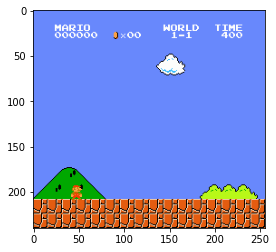

In [10]:
#frame before grayscale
state = env.reset()
plt.imshow(state), state.shape

In [11]:
#convert frame to grayscale
#keep dim - keep last channel (1)
env = GrayScaleObservation(env, keep_dim=True)

(<matplotlib.image.AxesImage at 0x204c2bc62f0>, (240, 256, 1))

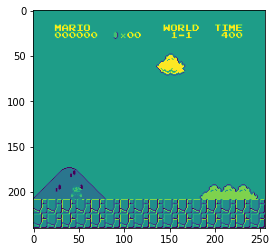

In [12]:
#frame after grayscale
state = env.reset()
plt.imshow(state), state.shape

In [13]:
#wrap with dummy environment
env = DummyVecEnv([lambda: env])
state = env.reset()
state.shape

(1, 240, 256, 1)

In [14]:
#frame stacking
env = VecFrameStack(env, 4, channels_order='last')
state = env.reset()
state.shape

(1, 240, 256, 4)

In [22]:
state = env.reset()

In [35]:
state, reward, done, info = env.step([5])

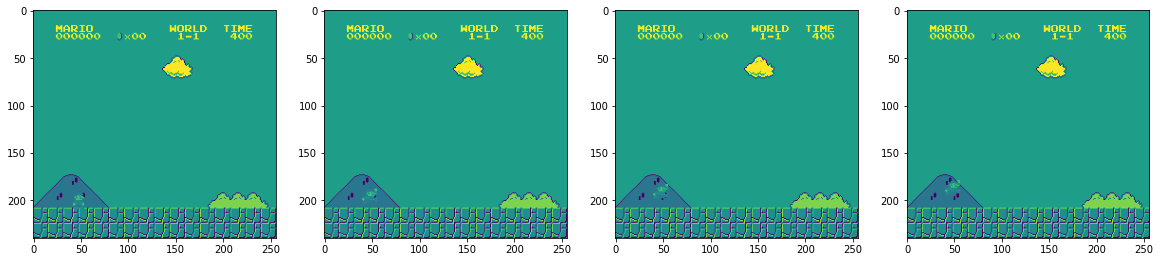

In [36]:
plt.figure(figsize=(20,16))
for idx in range(state.shape[3]):
    plt.subplot(1,4,idx+1)
    plt.imshow(state[0][:,:,idx])
plt.show()

In [37]:
import os
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback

In [38]:
class TrainAndLoggingCallback(BaseCallback):

    def __init__(self, check_freq, save_path, verbose=1):
        super(TrainAndLoggingCallback, self).__init__(verbose)
        self.check_freq = check_freq
        self.save_path = save_path

    def _init_callback(self):
        if self.save_path is not None:
            os.makedirs(self.save_path, exist_ok=True)

    def _on_step(self):
        if self.n_calls % self.check_freq == 0:
            model_path = os.path.join(self.save_path, 'best_model_{}'.format(self.n_calls))
            self.model.save(model_path)

        return True

In [39]:
CHECKPOINT_DIR = './train/'
LOG_DIR = './logs/'

In [40]:
# setup model saving callback
callback = TrainAndLoggingCallback(check_freq=50000, save_path=CHECKPOINT_DIR)

In [41]:
# create the model
model = PPO('CnnPolicy', env, verbose=1, tensorboard_log=LOG_DIR, learning_rate=0.000001, n_steps=512) 

Using cuda device
Wrapping the env in a VecTransposeImage.


In [ ]:
# Train the model
model.learn(total_timesteps=1500000, callback=callback)

In [43]:
model.save('./train/my_model')

In [48]:
model = PPO.load('./train/my_model')

In [ ]:
# Start the game 
state = env.reset()
# Loop through the game
while True: 
    
    action, _ = model.predict(state)
    state, reward, done, info = env.step(action)
    env.render()